In [1]:
# itertools is a module that provides useful functions 
# for efficient looping
from itertools import groupby
import matplotlib.pyplot as plt

import csv
input_file = 'iris.csv'

with open(input_file, 'r') as iris_data:
    irises = list(csv.reader(iris_data))

We have converted the CSV file into a python list of lists. 
https://en.wikipedia.org/wiki/Iris_flower_data_set

- column 0: sepal length
- column 1: sepal width
- column 2: petal length
- column 3: petal width
- column 4: iris species (Setosa, Versicolor or Virginica)


In [2]:
irises

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

In [3]:
# pop the unuseful empty [] at the end.
irises.pop()

[]

# Adjust matplotlib parameters

In [31]:
fig = plt.figure(figsize=(7.5, 4.25))
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 600x340 with 0 Axes>

# SCATTER PLOT: correlation
Let’s utilize a scatter plot to see what correlations if any, there are between the sepal length and width based on the variety of iris.

In [23]:
# colors expressed as HEX, short code for gree or html color
colors = {"Iris-setosa": "#2B5B84", "Iris-versicolor": "g", "Iris-virginica": "purple"}

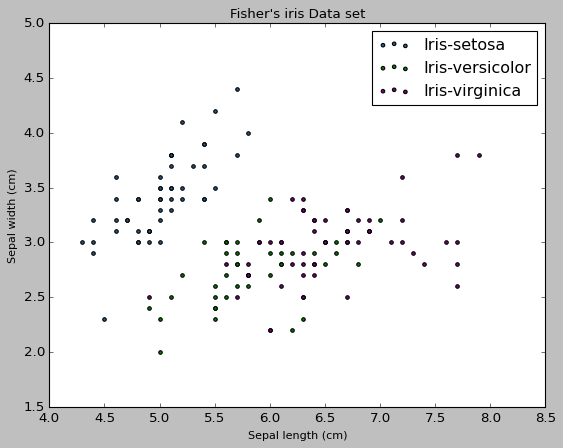

In [24]:
# group is a generator so you can only go over it one time.
for species, group in groupby(irises, lambda i: i[4]):
    categorized_irises = list(group)
    sepal_lengths = [float(iris[0]) for iris in categorized_irises]
    sepal_widths = [float(iris[1]) for iris in categorized_irises]
    plt.scatter(sepal_lengths, sepal_widths, s=10, c=colors[species], label=species)

plt.title("Fisher's iris Data set", fontsize=12)
plt.xlabel("Sepal length (cm)", fontsize=10)
plt.ylabel("Sepal width (cm)", fontsize=10)
plt.legend(loc="upper right") # upper left, upper center, bottom left...
plt.show()

Iris Setosa is a pretty good grouping. Ther is some outliers though. The other 2 varieties seem to be clumped together and intermixed with some even greater outliers. 

Conclusion : it appears that all 3 iris varieties have a positive correlation between sepal length and width. Iris Setosa has a better defined positive correlation that the other varieties. 

In [25]:
categorized_irises[:2]

[['6.3', '3.3', '6.0', '2.5', 'Iris-virginica'],
 ['5.8', '2.7', '5.1', '1.9', 'Iris-virginica']]

# HISTOGRAM : Distribution of petal lengths of the virginica class
Histograms are used to show distributions of data. Let's explore the Iris data set with this chart style.

In [26]:
# adjust matplotlib parameters
plt.style.use('classic')

In [27]:
virginica_petal_length = []
num_bins=10
for iris in range (0, len(irises)-1):
    if irises[iris][4] == "Iris-virginica":
        virginica_petal_length.append(float(irises[iris][2]))
virginica_petal_length[:10]

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1]

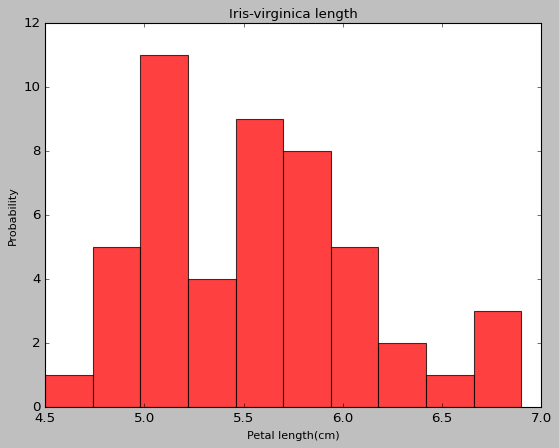

In [28]:
plt.hist(virginica_petal_length, num_bins, facecolor='red', alpha=0.75)
plt.title('Iris-virginica length', fontsize=12)
plt.xlabel('Petal length(cm)', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

# BOX PLOT
Box plots are useful when visualizing multiple variables simultaneously on the same chart. Let's examine the petal length of each iris class.

In [29]:
petal_lengths=[]
for species, group in groupby(irises, lambda i:i[4]):
    petal_lengths.append([float(iris[2]) for iris in group])

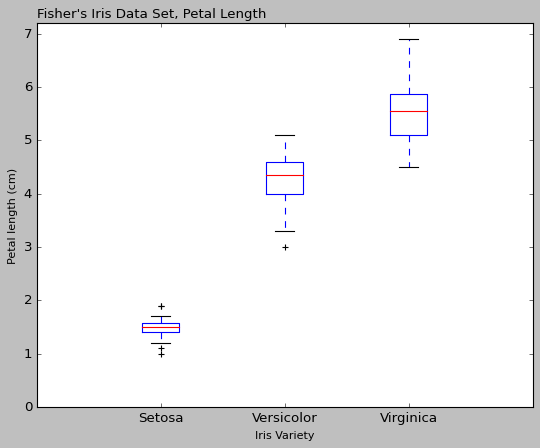

In [30]:
plt.boxplot(petal_lengths)
plt.axis([0, 4, 0, 7.2])
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.title("Fisher's Iris Data Set, Petal Length", fontsize=12, loc="left")
plt.xlabel("Iris Variety", fontsize=10)
plt.ylabel("Petal length (cm)", fontsize=10)
fig.savefig('petal_length_boxplot.png')
plt.show()